In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import requests 
import cv2
import warnings 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [0]:
train_labels = pd.read_csv('drive/My Drive/mask detection challenge/train_labels.csv')

In [4]:
train_labels.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


In [0]:
import os 
images_list = os.listdir('drive/My Drive/mask detection challenge/images')

In [0]:
train_labels_list = train_labels['image'].tolist()

In [0]:
test_labels_list = [label for label in images_list if label not in train_labels_list]

In [8]:
len(test_labels_list) == len(images_list) - len(train_labels_list)

True

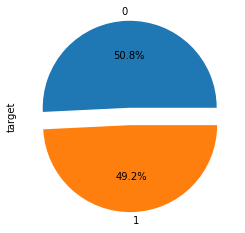

In [9]:
train_labels['target'].value_counts().plot.pie(explode=[0.1,0.1], autopct="%1.1f%%")

In [10]:
train_labels['target'].isnull().sum()

0

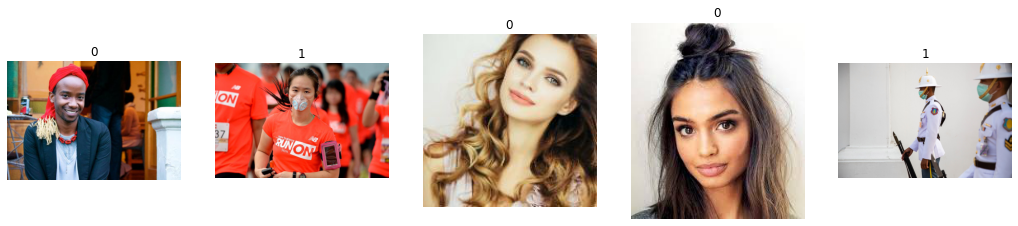

In [11]:
fig,axes = plt.subplots(1,5, figsize=(18,18))
for i in range(5):
    ax = axes[i]
    img = mpimg.imread('drive/My Drive/mask detection challenge/images/'+train_labels['image'][i])
    ax.imshow(img)
    ax.set_title(train_labels['target'][i] )
    ax.axis('off')
plt.show()

In [12]:
for i in range(5):
    ax = axes[i]
    img = mpimg.imread('drive/My Drive/mask detection challenge/images/'+train_labels['image'][i])
    print(img.shape)

(411, 600, 3)
(531, 800, 3)
(166, 166, 3)
(239, 211, 3)
(1000, 1500, 3)


In [0]:
train_labels['size'] = train_labels['image'].apply(lambda x:cv2.imread('drive/My Drive/mask detection challenge/images/'+x).shape)

In [0]:
train_labels['size'] = train_labels['size'].apply(lambda x:list(x))

In [15]:
np.mean(train_labels['size'].apply(lambda x:x[0]).tolist())

448.04587155963304

In [16]:
np.mean(train_labels['size'].apply(lambda x:x[1]).tolist())

626.0741590214067

In [0]:
def resize_images(list_of_images):
  """ Returns an Array of resized images """

  train_X = []
  NROWS=450 ; NCOLS=630
  for label in list_of_images:
    train_X.append(cv2.resize(cv2.cvtColor(cv2.imread('drive/My Drive/mask detection challenge/images/'+label), cv2.COLOR_BGR2RGB), (NROWS,NCOLS),interpolation=cv2.INTER_CUBIC))
  
  return train_X


In [0]:
train_X = resize_images(train_labels['image'].tolist())

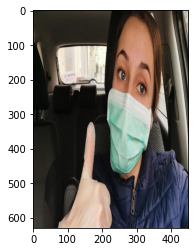

In [19]:
plt.imshow(train_X[20])

In [0]:
train_Y = train_labels['target'].tolist()

In [21]:
len(train_X) == len(train_Y)

True

In [0]:
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [23]:
print(train_X.shape, train_Y.shape)

(1308, 630, 450, 3) (1308,)


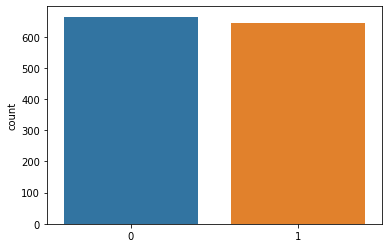

In [24]:
import seaborn as sns
sns.countplot(train_Y)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(train_X,train_Y, test_size=0.2,random_state=2)

In [26]:
print(x_train.shape, x_val.shape)

(1046, 630, 450, 3) (262, 630, 450, 3)


In [27]:
from tensorflow.python.keras import layers 
from tensorflow.python.keras import models
from keras import optimizers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(630,450,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.72)) #Used for regularization majorly to avoid Overfitting 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 1 Layer because this is the output and the activation is also switched to sigmoid because only two distinct classes are involved here 



In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 628, 448, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 314, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 312, 222, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 156, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 154, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 77, 54, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 52, 128)       1

In [0]:
#Next step is to compile our model 

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(), metrics =['acc'])

#binary_crossentropy is used because this is a binary classification task and the optimizer's learning rate is also 
#specified to be 0.0001 (However, this can be further tuned to improve the model's performance generally)

In [0]:
#Using ImageDataGenerator to Normalize the image pixel values to have a standard deviation of 1 and a mean of 0. And also to augment the dataset to prevent overfitting

#Creating the augmentation configuration below 

train_datagen = ImageDataGenerator(rescale= 1./255, #Scale the image between 0 and 1
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range= 0.2,
                                   shear_range= 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale= 1./255) #We do not augment validation data, we only rescale

In [0]:
batch_size = 128
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size= batch_size)

In [0]:
ntrain = len(x_train)
nval = len(x_val)


In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = ntrain // batch_size,
                              epochs = 64,
                              validation_data = val_generator,
                              validation_steps = nval // batch_size
                              )

Epoch 1/64
8/8 [==============================] - 53s 7s/step - loss: 0.8162 - acc: 0.5146 - val_loss: 0.7129 - val_acc: 0.4727
Epoch 2/64
8/8 [==============================] - 53s 7s/step - loss: 0.6985 - acc: 0.4989 - val_loss: 0.6957 - val_acc: 0.4727
Epoch 3/64
8/8 [==============================] - 47s 6s/step - loss: 0.6928 - acc: 0.5076 - val_loss: 0.6925 - val_acc: 0.4961
Epoch 4/64
8/8 [==============================] - 47s 6s/step - loss: 0.6813 - acc: 0.5654 - val_loss: 0.6954 - val_acc: 0.5078
Epoch 5/64
8/8 [==============================] - 47s 6s/step - loss: 0.6895 - acc: 0.5556 - val_loss: 0.6847 - val_acc: 0.5234
Epoch 6/64
8/8 [==============================] - 47s 6s/step - loss: 0.6758 - acc: 0.5697 - val_loss: 0.7349 - val_acc: 0.4648
Epoch 7/64
8/8 [==============================] - 47s 6s/step - loss: 0.6943 - acc: 0.5207 - val_loss: 0.6872 - val_acc: 0.5117
Epoch 8/64
2/8 [======>.......................] - ETA: 21s - loss: 0.6938 - acc: 0.4297

In [0]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

In [35]:
test_labels_list

['ioedeamftahwmovcpgigwnypdhykwz.jpg',
 'thxqsrejgecdethcqecanudtfofcrh.jpg',
 'tldspzpkenscsjyokedqawzuqdbjfh.jpg',
 'urfpnxaaxslypipkziqixilgvtitse.jpg',
 'piswtqhtpepgcmilxfeiegdqpofqig.jpg',
 'sseuokumxzgersmrlhofzkzgrkozkq.png',
 'ilyczntkhdwwqxgayvmewwrvonzokc.jpg',
 'fmkdsmhmklnzkownqsschpnomjedlx.jpg',
 'wtcbodbqepiirrtgpzclqipkojxodr.jpg',
 'bucfsqoezlveinjzzyyfiianjzrklf.jpg',
 'uoqujcamsyjwlwoztrnvutbgrhdtkx.jpg',
 'gadijdxgeinztdiaolvtceypzbvlam.jpg',
 'cemwpmilmtzyyvpoxxflruiyubdzvc.jpg',
 'kfkptevnxrhoofzewofglxzxgvkdcg.jpg',
 'itsfoylidpuiehheyisjrssydwpkjs.jpg',
 'tnptubiwafwpnymkaaudzcjibkzfgp.jpg',
 'aclkjfvackiieiznzfcwienplielrj.jpg',
 'lckpbjorlzqrhcccowfsaltairdvtd.png',
 'dxkxrtwzulytuhegnxjznhxxsqdvjt.jpg',
 'plcaliiefkehjeqojgsaiztfbluwbx.jpg',
 'idardcfquyazdghrsrbiyujmguzxnr.jpg',
 'czfaqpiyukmerduehjkdrhkhtqxbia.jpg',
 'puffqlvmnlfcwcplpgbrgkuhgkejnl.jpg',
 'gkxebviifcnfepepkzewerqlksciqa (1).jpg',
 'mzaawjyklcynlmsxhziexrqskewnsl.jpg',
 'noesixortoazgbkeukq

In [0]:
test_data = resize_images(test_labels_list)

In [0]:
test_data = np.array(test_data)

In [38]:
test_data.shape

(519, 630, 450, 3)

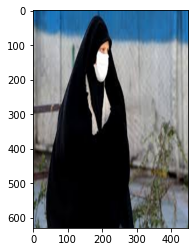

In [39]:
plt.imshow(test_data[18])

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
test_generator = test_datagen.flow(test_data)

In [0]:
test_data_scaled = test_data.astype('float')/255

In [0]:
prediction = model.predict(test_data_scaled)

In [51]:
prediction.reshape(1,-1)[0]

array([0.2089615 , 0.66522115, 0.38811886, 0.21303639, 0.80057293,
       0.88136035, 0.6406586 , 0.73547196, 0.41999483, 0.5963136 ,
       0.45601434, 0.2776553 , 0.644642  , 0.410835  , 0.5764769 ,
       0.3907815 , 0.899592  , 0.6943119 , 0.97175354, 0.78813624,
       0.40624332, 0.69518715, 0.31027728, 0.6429875 , 0.22962435,
       0.72896236, 0.41734242, 0.5511476 , 0.45985132, 0.53311986,
       0.16491137, 0.8629026 , 0.79158944, 0.75508785, 0.46442646,
       0.26961842, 0.24814309, 0.27986407, 0.3187753 , 0.8944223 ,
       0.5710853 , 0.25492904, 0.23444691, 0.44365653, 0.50686544,
       0.39868665, 0.75739056, 0.7359384 , 0.24128403, 0.713037  ,
       0.9060064 , 0.6939986 , 0.21015754, 0.09517378, 0.1183788 ,
       0.39118826, 0.33952078, 0.12338589, 0.37248284, 0.89317334,
       0.46777067, 0.5433198 , 0.62096643, 0.3600904 , 0.9135504 ,
       0.31643617, 0.22490996, 0.31666982, 0.18226989, 0.76676804,
       0.88636005, 0.5832019 , 0.5223104 , 0.14837213, 0.14807

In [0]:
submission_keras = pd.DataFrame({"image":test_labels_list, "target":prediction.reshape(1,-1)[0]})

In [53]:
submission_keras.head()

,image,target
0,ioedeamftahwmovcpgigwnypdhykwz.jpg,0.208962
1,thxqsrejgecdethcqecanudtfofcrh.jpg,0.665221
2,tldspzpkenscsjyokedqawzuqdbjfh.jpg,0.388119
3,urfpnxaaxslypipkziqixilgvtitse.jpg,0.213036
4,piswtqhtpepgcmilxfeiegdqpofqig.jpg,0.800573


In [0]:
submission_keras.to_csv('drive/My Drive/mask detection challenge/submission_keras.csv', index=False)

## Using Fastai - From Pytorch

In [55]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:

from pathlib import Path

from fastai.basic_data import DatasetType
from fastai.callbacks import SaveModelCallback
from fastai.metrics import accuracy
from fastai.train import ClassificationInterpretation
from fastai.vision.data import ImageList
from fastai.vision.learner import cnn_learner
from fastai.vision.models import resnet18
from fastai.vision.transform import ResizeMethod, get_transforms
from fastai.vision import imagenet_stats